In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Parquet file
data_file_parquet = '/Users/andre/github-classroom/rail_data_cleaned_20230728132300.parquet'
df = pd.read_parquet(data_file_parquet)


# Summary statistics of the dataset
print(df.describe())





      working_time_pass           working_time_arrival   
count                 0                          37100  \
mean                NaT  2023-07-28 02:07:39.208220928   
min                 NaT            2023-07-27 00:01:00   
25%                 NaT            2023-07-27 19:55:00   
50%                 NaT            2023-07-27 23:20:00   
75%                 NaT            2023-07-28 07:54:00   
max                 NaT            2023-07-29 02:15:00   
std                 NaN                            NaN   

              working_time_departure           planned_time_arrival   
count                          37100                          33855  \
mean   2023-07-28 02:07:31.254582272  2023-07-28 02:31:47.884802816   
min              2023-07-27 00:01:00            2023-07-27 00:01:00   
25%              2023-07-27 19:55:00            2023-07-27 19:54:00   
50%              2023-07-27 23:21:00            2023-07-27 23:19:00   
75%              2023-07-28 07:55:00            202

In [11]:
print(df.head())

           route_id unique_id service_start_date update_origin train_platform   
8   202307277679020    L79020         2023-07-27        Darwin           STFD  \
10  202307277679020    L79020         2023-07-27        Darwin        SPNY205   
16  202307277679020    L79020         2023-07-27        Darwin         PADTLL   
17  202307277679020    L79020         2023-07-27        Darwin        WBRNPKS   
22  202307277674553    L74553         2023-07-27            TD        SVNOAKS   

   working_time_pass working_time_arrival working_time_departure   
8                NaT  2023-07-27 00:03:00    2023-07-27 00:03:30  \
10               NaT  2023-07-27 00:07:00    2023-07-27 00:13:30   
16               NaT  2023-07-27 00:30:30    2023-07-27 00:31:00   
17               NaT  2023-07-27 00:33:00    2023-07-27 00:35:00   
22               NaT  2023-07-27 21:53:00    2023-07-27 21:54:30   

   planned_time_arrival planned_time_departure  pass platform train_length   
8                   NaT   

In [12]:
# Check for missing values
print(df.isnull().sum())


route_id                      0
unique_id                     0
service_start_date            0
update_origin               585
train_platform                0
working_time_pass         37100
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3245
planned_time_departure     3520
pass                      37100
platform                   2986
train_length              26505
actual_arrival_time        5331
actual_departure_time      2716
is_delayed_arrival            0
is_delayed_departure          0
dtype: int64


In [13]:
# Data types of columns
print(df.dtypes)


route_id                          object
unique_id                         object
service_start_date                object
update_origin                     object
train_platform                    object
working_time_pass         datetime64[ns]
working_time_arrival      datetime64[ns]
working_time_departure    datetime64[ns]
planned_time_arrival      datetime64[ns]
planned_time_departure    datetime64[ns]
pass                             float64
platform                          object
train_length                      object
actual_arrival_time       datetime64[ns]
actual_departure_time     datetime64[ns]
is_delayed_arrival                  bool
is_delayed_departure                bool
dtype: object


In [14]:
# Explore unique values in categorical columns
categorical_columns = ['update_origin', 'train_platform', 'platform']
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in update_origin: ['Darwin' 'TD' 'CIS' 'Trust' None 'Tyrell' 'Workstation']
Unique values in train_platform: ['STFD' 'SPNY205' 'PADTLL' ... 'NEILTBS' 'THUSTON' 'PRKSTON']
Unique values in platform: ['5' None 'B' 'A' '1' '8' '2' '4' '3' '10' 'CL' 'BUS' '6' '4A' '12B' '7'
 '7N' '0' '14' '3B' 'UDG' '9' 'SDG' '15' '13' '5B' 'HS' 'DTS' '12' '11'
 '15A' '12C' '4B' 'S1' '9C' '5A' '3A' 'DER' '10A' '17' '12A' '16' '6A'
 '11A' '1B' 'URS' '11B' '2B' 'D' 'RES' 'C' 'DTL' '15B' '1A' '1L' '9B' '2A'
 '19' '8D' '7B' 'UML' '9E' 'UDS' '8B' '6B' '7A' 'S4' 'TBC' '9A' 'EXE'
 'SGL' 'DM' '16A' '11D' 'DOR' 'S3' '13B' 'TRU' '8A' '16B' 'GL1' '14A'
 'DRL' 'DG' '14B' 'NEW' 'EXM' 'FAL' '2F' '6N' '1C' 'PLY' 'UPL' 'GUN']


In [15]:
# Frequency count for 'update_origin'
update_origin_counts = df['update_origin'].value_counts()
print(update_origin_counts)

# Frequency count for 'train_platform'
train_platform_counts = df['train_platform'].value_counts()
print(train_platform_counts)

# Frequency count for 'platform'
platform_counts = df['platform'].value_counts()
print(platform_counts)


update_origin
CIS            14433
TD             10576
Darwin          8983
Trust           2203
Tyrell           292
Workstation       28
Name: count, dtype: int64
train_platform
LNDNBDE    317
WLOE       166
ECROYDN    147
CRKLWD     147
STKP       147
          ... 
PRTSMTA      1
CHAPLTN      1
DIDCTNJ      1
WANTRD       1
PRKSTON      1
Name: count, Length: 2603, dtype: int64
platform
2      12802
1      12575
3       2946
4       2005
5        709
       ...  
GL1        1
16B        1
9E         1
TRU        1
2B         1
Name: count, Length: 93, dtype: int64


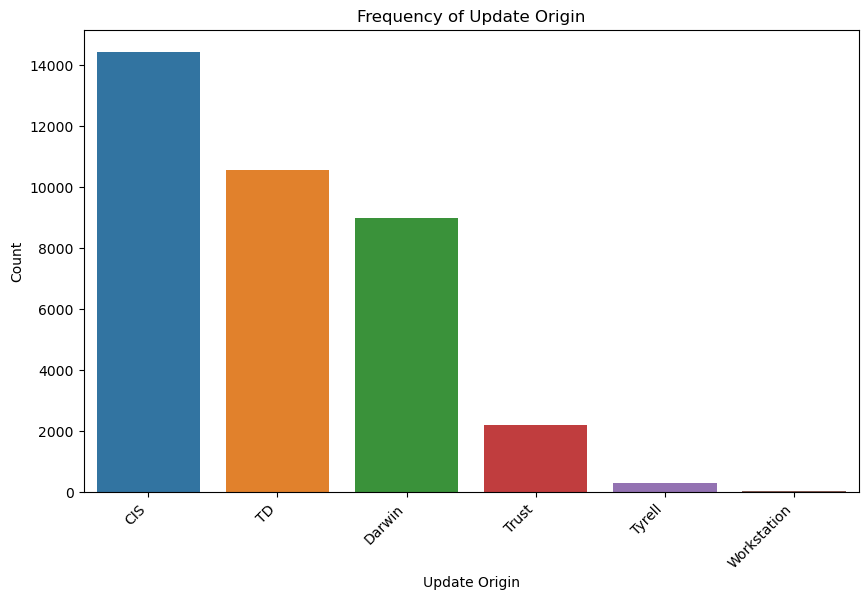

In [17]:
# Frequency count data
update_origin_counts = {
    'CIS': 14433,
    'TD': 10576,
    'Darwin': 8983,
    'Trust': 2203,
    'Tyrell': 292,
    'Workstation': 28
}

train_platform_counts = {
    'LNDNBDE': 317,
    'WLOE': 166,
    'ECROYDN': 147,
    'CRKLWD': 147,
    'STKP': 147,
    # ...
}

platform_counts = {
    '2': 12802,
    '1': 12575,
    '3': 2946,
    '4': 2005,
    '5': 709,
    # ...
}

# Bar plot for 'update_origin'
plt.figure(figsize=(10, 6))
sns.barplot(x=list(update_origin_counts.keys()), y=list(update_origin_counts.values()))
plt.xlabel('Update Origin')
plt.ylabel('Count')
plt.title('Frequency of Update Origin')
plt.xticks(rotation=45, ha='right')
plt.show()


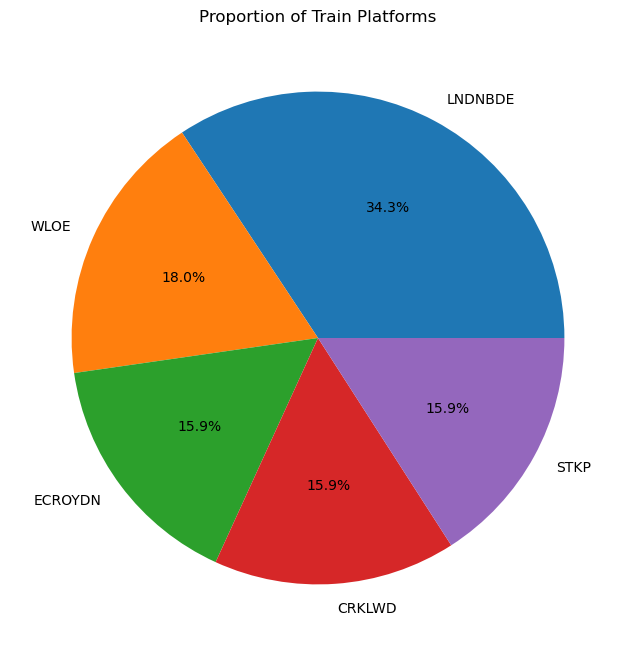

In [18]:
# Pie chart for 'train_platform'
plt.figure(figsize=(8, 8))
plt.pie(list(train_platform_counts.values()), labels=list(train_platform_counts.keys()), autopct='%1.1f%%')
plt.title('Proportion of Train Platforms')
plt.show()


In [22]:


# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the total number of missing values in each column
print("Missing values in each column:")
print(missing_values)

# If you want to see the percentage of missing values in each column:
total_rows = df.shape[0]
percentage_missing = (missing_values / total_rows) * 100

print("\nPercentage of missing values in each column:")
print(percentage_missing)


Missing values in each column:
route_id                      0
unique_id                     0
service_start_date            0
update_origin               585
train_platform                0
working_time_pass         37100
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3245
planned_time_departure     3520
pass                      37100
platform                   2986
train_length              26505
actual_arrival_time        5331
actual_departure_time      2716
is_delayed_arrival            0
is_delayed_departure          0
dtype: int64

Percentage of missing values in each column:
route_id                    0.000000
unique_id                   0.000000
service_start_date          0.000000
update_origin               1.576819
train_platform              0.000000
working_time_pass         100.000000
working_time_arrival        0.000000
working_time_departure      0.000000
planned_time_arrival        8.746631
planned_time_departure      9.487

## Connected from PostAdmin to AWS +
## Setting up pipeline - Tomorrow / Monday 
## More EDA - The whole time
## Docker-compose file -  Tomorrow / Monday
## Created an account for API +
## Make a commit to see if we run into issues +

In [23]:
station_visits = df['train_platform'].value_counts()

# Sort the stations based on visit counts in descending order
sorted_stations = station_visits.sort_values(ascending=False)

# Select the top 10 stations with the highest visit counts
top_10_stations = sorted_stations.head(10)

print(top_10_stations)

train_platform
LNDNBDE    317
WLOE       166
ECROYDN    147
STKP       147
CRKLWD     147
VAUXHLM    132
RDNGSTN    123
CLPHMJM    119
GTWK       118
BLFR       117
Name: count, dtype: int64


In [34]:
print(df['working_time_pass'])

8       NaT
10      NaT
16      NaT
17      NaT
22      NaT
         ..
94233   NaT
94235   NaT
94238   NaT
94240   NaT
94243   NaT
Name: working_time_pass, Length: 37100, dtype: datetime64[ns]


In [35]:
print(df['working_time_arrival'])

8       2023-07-27 00:03:00
10      2023-07-27 00:07:00
16      2023-07-27 00:30:30
17      2023-07-27 00:33:00
22      2023-07-27 21:53:00
                ...        
94233   2023-07-27 17:30:30
94235   2023-07-27 17:44:00
94238   2023-07-27 17:58:30
94240   2023-07-27 18:08:30
94243   2023-07-27 18:18:30
Name: working_time_arrival, Length: 37100, dtype: datetime64[ns]


In [37]:
print(df['planned_time_arrival'])

8                       NaT
10                      NaT
16                      NaT
17                      NaT
22      2023-07-27 21:53:00
                ...        
94233   2023-07-27 17:31:00
94235   2023-07-27 17:44:00
94238   2023-07-27 17:59:00
94240   2023-07-27 18:09:00
94243   2023-07-27 18:19:00
Name: planned_time_arrival, Length: 37100, dtype: datetime64[ns]


In [39]:
print(df['actual_arrival_time'])

8       2023-07-27 00:53:00
10      2023-07-27 00:57:00
16      2023-07-27 01:07:00
17      2023-07-27 01:09:00
22                      NaT
                ...        
94233   2023-07-27 18:07:00
94235   2023-07-27 18:18:00
94238   2023-07-27 18:29:00
94240   2023-07-27 18:35:00
94243   2023-07-27 18:44:00
Name: actual_arrival_time, Length: 37100, dtype: datetime64[ns]


In [40]:
print(df['actual_departure_time'])

8       2023-07-27 00:53:00
10      2023-07-27 00:58:00
16      2023-07-27 01:07:00
17      2023-07-27 01:10:00
22                      NaT
                ...        
94233   2023-07-27 18:08:00
94235   2023-07-27 18:19:00
94238   2023-07-27 18:30:00
94240   2023-07-27 18:35:00
94243   2023-07-27 18:45:00
Name: actual_departure_time, Length: 37100, dtype: datetime64[ns]


In [43]:


df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'])

# Define the desired 12-hour clock format with AM/PM indicators
time_format_12h = "%I:%M:%S %p"

# Format the 'actual_departure_time' column to 12-hour clock format
formatted_time = df['actual_departure_time'].dt.strftime(time_format_12h)

# Concatenate the date and time to get the final result
df['formatted_departure_time'] = df['actual_departure_time'].dt.strftime("%Y-%m-%d") + " " + formatted_time

# Display the DataFrame with the formatted date and time
print(df['formatted_departure_time'])



C:\Users\andre\AppData\Local\Temp\ipykernel_2348\687118461.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'])


8        2023-08-03 12:53:00 AM
10       2023-08-03 12:58:00 AM
16       2023-08-03 01:07:00 AM
17       2023-08-03 01:10:00 AM
22                          NaN
                  ...          
94233    2023-08-03 06:08:00 PM
94235    2023-08-03 06:19:00 PM
94238    2023-08-03 06:30:00 PM
94240    2023-08-03 06:35:00 PM
94243    2023-08-03 06:45:00 PM
Name: formatted_departure_time, Length: 37100, dtype: object


In [47]:
df_csv = pd.read_csv('/Users/andre/github-classroom/RailReferences.csv')
df_csv.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


In [48]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,pass,platform,train_length,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
8,202307277679020,L79020,2023-07-27,Darwin,STFD,NaT,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,NaN,5,None,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,NaT,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,NaN,None,None,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,NaT,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,NaN,B,None,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,NaT,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,NaN,A,None,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True
22,202307277674553,L74553,2023-07-27,TD,SVNOAKS,NaT,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,NaN,1,8,NaT,NaT,False,False


In [52]:
df_csv.loc[df_csv['CrsCode']=='STFD']

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification


In [56]:
print(df_csv.dtypes)


AtcoCode                 object
TiplocCode               object
CrsCode                  object
StationName              object
StationNameLang         float64
GridType                 object
Easting                   int64
Northing                  int64
CreationDateTime         object
ModificationDateTime     object
RevisionNumber            int64
Modification             object
dtype: object


In [59]:

merged_df = df.join(df_csv, lsuffix='actual_arrival_time', rsuffix='CreationDateTime', how='left')
print(merged_df.head())

           route_id unique_id service_start_date update_origin train_platform   
8   202307277679020    L79020         2023-07-27        Darwin           STFD  \
10  202307277679020    L79020         2023-07-27        Darwin        SPNY205   
16  202307277679020    L79020         2023-07-27        Darwin         PADTLL   
17  202307277679020    L79020         2023-07-27        Darwin        WBRNPKS   
22  202307277674553    L74553         2023-07-27            TD        SVNOAKS   

   working_time_pass working_time_arrival working_time_departure   
8                NaT  2023-07-27 00:03:00    2023-07-27 00:03:30  \
10               NaT  2023-07-27 00:07:00    2023-07-27 00:13:30   
16               NaT  2023-07-27 00:30:30    2023-07-27 00:31:00   
17               NaT  2023-07-27 00:33:00    2023-07-27 00:35:00   
22               NaT  2023-07-27 21:53:00    2023-07-27 21:54:30   

   planned_time_arrival planned_time_departure  ...  CrsCode   
8                   NaT                 

In [60]:
merged_df[['StationName','train_platform']].head()

,StationName,train_platform
8,Arisaig Rail Station,STFD
10,Morar Rail Station,SPNY205
16,Penryn Rail Station,PADTLL
17,Perranwell Rail Station,WBRNPKS
22,Newquay Rail Station,SVNOAKS


In [62]:
station_visits = merged_df['StationName'].value_counts()

# Sort the stations based on visit counts in descending order
sorted_stations = station_visits.sort_values(ascending=False)

# Select the top 10 stations with the highest visit counts
top_10_stations = sorted_stations.head()

print(top_10_stations)

StationName
Watford Junction Rail Station        2
Harrow & Wealdstone Rail Station     2
Stourbridge Junction Rail Station    2
Bishop Auckland Rail Station         2
Upminster Rail Station               2
Name: count, dtype: int64
